## First benchmark

To benchmark: estimating disassembly indexes for increasing levels of complex peptidomes


        

In [1]:
from disassembly.simulate_proteolysis import enzyme_set, enzyme, amino_acids


enzymes1 = enzyme_set(
    [
        enzyme({"K": 1}, "K protease"),
    ],
    [1],
    [1],
)

enzymes2 = enzyme_set(
    [
        enzyme({"K": 0.5, "R": 0.5}, "K+R protease"),
    ],
    [1],
    [1],
)


enzymes3 = enzyme_set(
    [
        enzyme({"V": 0.35, "I": 0.25, "A": 0.2, "T": 0.1}, "V+I+A+T protease"),
    ],
    [1],
    [1],
)

random = enzyme_set(
    [enzyme({aa: 1 / len(amino_acids) for aa in amino_acids.values()}, "random")],
    [1],
    [1],
)

In [2]:
protein = "MAHVRGLQLPGCLALAALCSLVHSQHVFLAPQQARSLLQRVRRANTFLEEVRKGNLERECVEETCSYEEAFEALESSTATDVFWAKYTACETARTPRDKLAACLEGNCAEGLGTNYRGHVNITRSGIECQLWRSRYPHKPEINSTTHPGADLQENFCRNPDSSTTGPWCYTTDPTVRRQECSIPVCGQDQVTVAMTPRSEGSSVNLSPPLEQCVPDRGQQYQGRLAVTTHGLPCLAWASAQAKALSKHQDFNSAVQLVENFCRNPDGDEEGVWCYVAGKPGDFGYCDLNYCEEAVEEETGDGLDEDSDRAIEGRTATSEYQTFFNPRTFGSGEADCGLRPLFEKKSLEDKTERELLESYIDGRIVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLLYPPWDKNFTENDLLVRIGKHSRTRYERNIEKISMLEKIYIHPRYNWRENLDRDIALMKLKKPVAFSDYIHPVCLPDRETAASLLQAGYKGRVTGWGNLKETWTANVGKGQPSVLQVVNLPIVERPVCKDSTRIRITDNMFCAGYKPDEGKRGDACEGDSGGPFVMKSPFNNRWYQMGIVSWGEGCDRDGKYGFYTHVFRLKKWIQKVIDQFGE"

In [3]:
from disassembly.benchmark import Benchmark
import matplotlib.pyplot as plt

bmrk = Benchmark()

enzyme_sets = [enzymes1, enzymes2, enzymes3, random]
enzyme_names = ["simple", "medium", "complex", "random"]

bmrk.simulate_degradation(protein, enzyme_sets=enzyme_sets, enzyme_names=enzyme_names, endo_or_exo_probability=[0.9, 0.1], iterations=2)


Running simple, 0
 499 / 500 (510)
185 unique peptides. 504 total

 Averaged DI: 2.41
Running simple, 1
 499 / 500 (502)
210 unique peptides. 503 total

 Averaged DI: 2.35
Running medium, 0
 499 / 500 (534)
222 unique peptides. 503 total

 Averaged DI: 2.03
Running medium, 1
 499 / 500 (531)
272 unique peptides. 503 total

 Averaged DI: 2.04
Running complex, 0
 499 / 500 (523)
364 unique peptides. 503 total

 Averaged DI: 1.96
Running complex, 1
 499 / 500 (537)
363 unique peptides. 503 total

 Averaged DI: 2.08
Running random, 0
 499 / 500 (524)
494 unique peptides. 503 total

 Averaged DI: 2.04
Running random, 1
 499 / 500 (538)
490 unique peptides. 503 total

 Averaged DI: 2.12


 10 / 500 | 0.35, mean: 0.76 | Decreasing | nz: 1376

/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/erikhartman/dev/disassembly/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


 99 / 500 | 0.05, mean: 0.28 | Increasing | nz: 1188
Learning rate decreased to 0.5
 174 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1543437
Learning rate decreased to 0.25
 198 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1543
 Averaged DI: 3.70
 99 / 500 | 0.03, mean: 0.02 | Plateau | nz: 1431363
Learning rate decreased to 0.5
 165 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1768
 Averaged DI: 3.70
 99 / 500 | 0.02, mean: 0.02 | Plateau | nz: 1530595
Learning rate decreased to 0.5
 166 / 500 | 0.00, mean: 0.00 | Plateau | nz: 1791
 Averaged DI: 3.12
 99 / 500 | 0.01, mean: 0.02 | Plateau | nz: 2056845
Learning rate decreased to 0.5
 164 / 500 | 0.00, mean: 0.00 | Plateau | nz: 2049
 Averaged DI: 3.54
 111 / 500 | 0.01, mean: 0.02 | Plateau | nz: 2142426
Learning rate decreased to 0.5
 186 / 500 | 0.00, mean: 0.01 | Plateau | nz: 2634
Learning rate decreased to 0.25
 192 / 500 | 0.00, mean: 0.01 | Plateau | nz: 2634
 Averaged DI: 3.17
 110 / 500 | 0.02, mean: 0.02 | Plateau | nz: 2434493
Learni

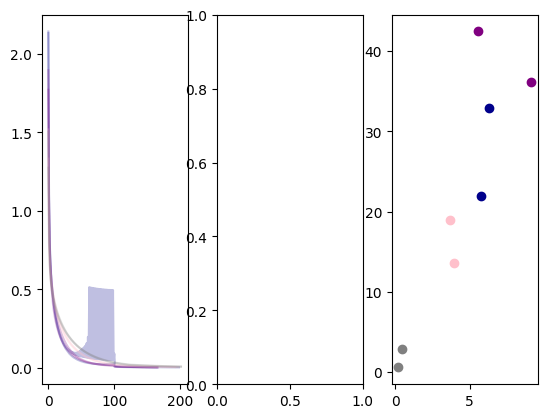

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,3, figsize=(15, 5))

bmrk.estimate_weights(method = "alg", n_iterations=500, lr=1)

bmrk.plot(axs[0], ptype="loss", method_name = "alg")
bmrk.plot(axs[1], ptype="corr_di", method_name = "alg")
bmrk.plot(axs[2], ptype="d", method_name = "alg")

 99 / 100 | 0.20, kl: 0.20, reg: 0.00  | nz: 1389 | 
 Averaged DI: 2.83
 99 / 100 | 0.20, kl: 0.20, reg: 0.00  | nz: 1661 | 
 Averaged DI: 2.89
 99 / 100 | 0.19, kl: 0.19, reg: 0.00  | nz: 1673 | 
 Averaged DI: 2.53
 99 / 100 | 0.19, kl: 0.19, reg: 0.00  | nz: 2124 | 
 Averaged DI: 2.79
 99 / 100 | 0.16, kl: 0.16, reg: 0.00  | nz: 2616 | 
 Averaged DI: 2.58
 99 / 100 | 0.16, kl: 0.16, reg: 0.00  | nz: 2444 | 
 Averaged DI: 2.61
 99 / 100 | 0.14, kl: 0.14, reg: 0.00  | nz: 3056 | 
 Averaged DI: 2.55
 99 / 100 | 0.22, kl: 0.22, reg: 0.00  | nz: 3180 | 
 Averaged DI: 2.72


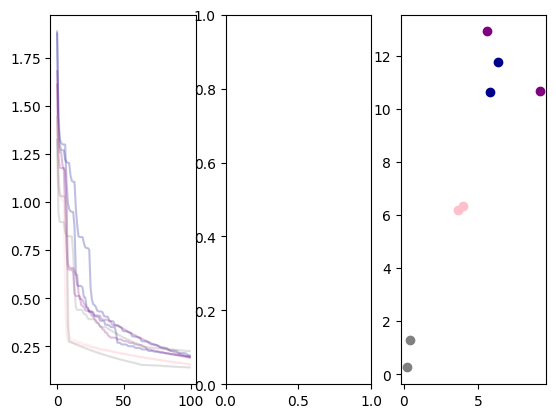

In [5]:
bmrk.estimate_weights(method = "gd")

fig, axs = plt.subplots(1,3, figsize=(15, 5))

bmrk.plot(ax=axs[0], ptype="loss", method_name = "gd")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name = "gd")
bmrk.plot(ax=axs[2], ptype="d", method_name = "gd")

In [ ]:
bmrk.estimate_weights(method = "gd", parameter_estimator=True)

fig, axs = plt.subplots(1,3, figsize=(15, 5))

bmrk.plot(ax=axs[0], ptype="loss", method_name = "gd_param")
bmrk.plot(ax=axs[1], ptype="corr_di", method_name = "gd_param")
bmrk.plot(ax=axs[2], ptype="d", method_name = "gd_param")

# Peptidomes

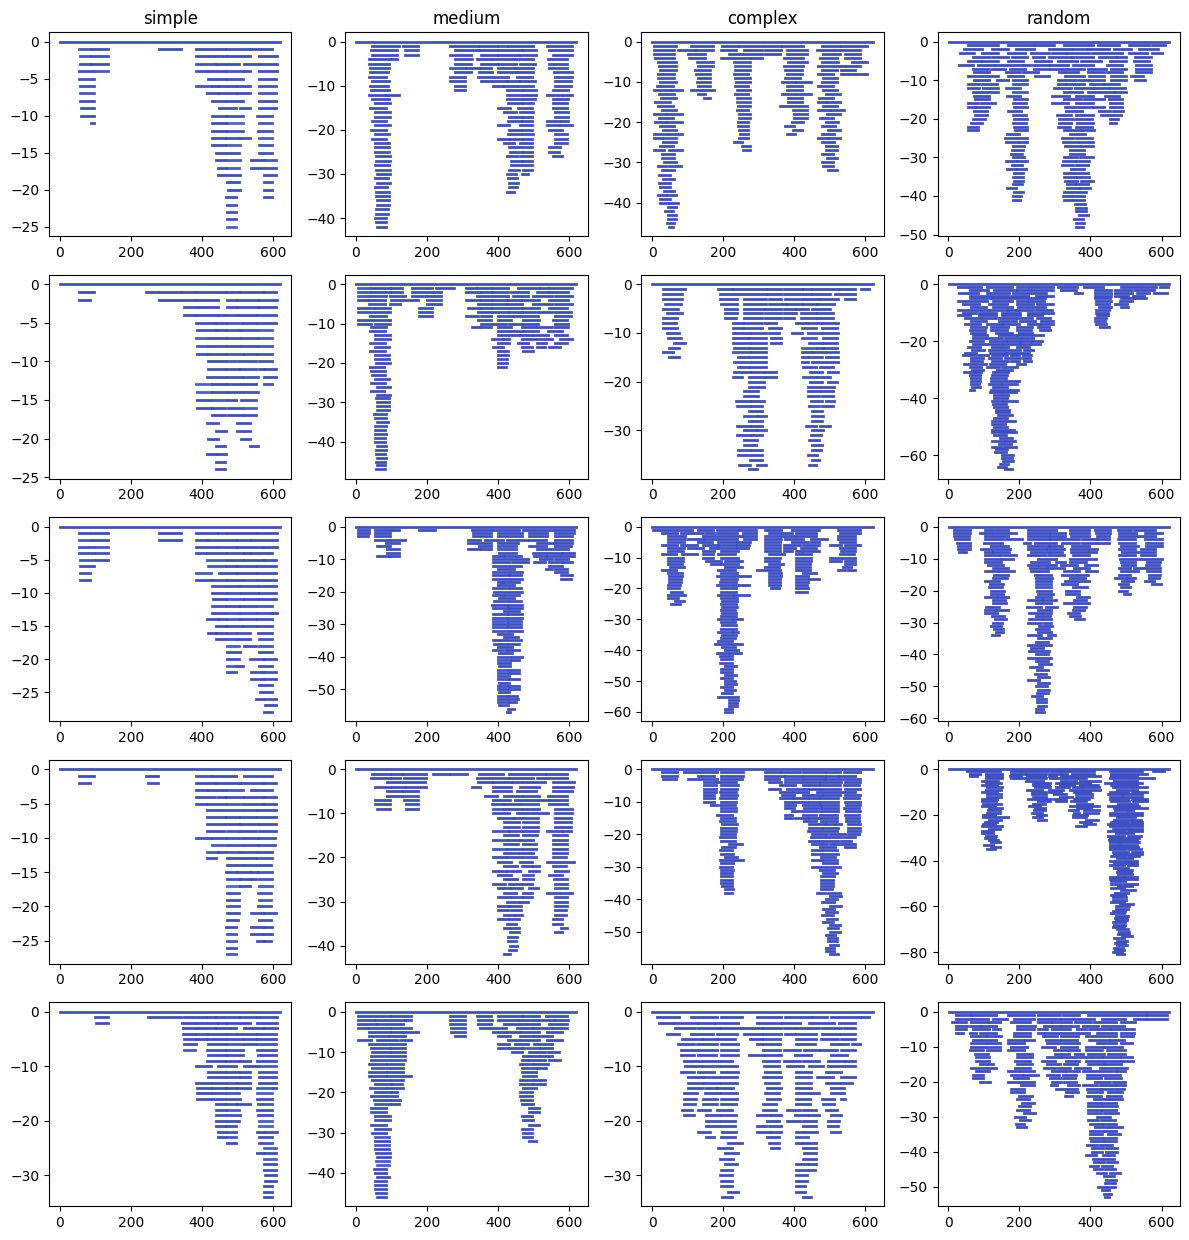

In [ ]:
from disassembly.util import plot_peptidome

fig, axs = plt.subplots(
    bmrk.iterations, len(bmrk.enzyme_names), figsize=(len(bmrk.enzyme_names) * 3, bmrk.iterations * 2.5)
)
for iteration in range(bmrk.iterations):
    for test_name in bmrk.enzyme_names:
        ax = axs[iteration, bmrk.enzyme_names.index(test_name)]
        if iteration == 0:
            ax.set_title(test_name)
        plot_peptidome(protein, bmrk.simulated_peptidomes[test_name][iteration], ax)
plt.tight_layout()